In [2]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py
import os
os.getcwd()

'C:\\Users\\rahim035\\DNNs_SV'

In [3]:
f = h5py.File("Dic_CPR_land.mat",'r')
list(f.keys())

['X_land_trn_detection',
 'X_land_trn_retrieval',
 'X_land_tst_detection',
 'X_land_tst_retrieval',
 'y_land_trn_detection',
 'y_land_trn_retrieval',
 'y_land_tst_detection',
 'y_land_tst_retrieval']

In [4]:
X0_trn_detection = f['X_land_trn_detection']
y0_trn_detection = f['y_land_trn_detection']
X0_tst_detection = f['X_land_tst_detection']
y0_tst_detection = f['y_land_tst_detection']

X0_trn_retrieval = f['X_land_trn_retrieval']
y0_trn_retrieval = f['y_land_trn_retrieval']
X0_tst_retrieval = f['X_land_tst_retrieval']
y0_tst_retrieval = f['y_land_tst_retrieval']

In [5]:
X1_trn_detection = np.transpose(X0_trn_detection)
X1_tst_detection = np.transpose(X0_tst_detection)
y_trn_detection = np.transpose(y0_trn_detection)
y_tst_detection = np.transpose(y0_tst_detection)

X1_trn_retrieval = np.transpose(X0_trn_retrieval)
X1_tst_retrieval = np.transpose(X0_tst_retrieval)
y_trn_retrieval = np.transpose(y0_trn_retrieval)
y_tst_retrieval = np.transpose(y0_tst_retrieval)

In [6]:
X1_trn_detection.astype('float64')
X1_tst_detection.astype('float64')
y_trn_detection.astype('int64')
y_tst_detection.astype('int64')

X1_trn_retrieval.astype('float64')
X1_tst_retrieval.astype('float64')
y_trn_retrieval.astype('float64')
y_tst_retrieval.astype('float64');

In [7]:
mean_detection = X1_trn_detection.mean(axis=0)
X2_trn_detection = X1_trn_detection-mean_detection
std_detection = X1_trn_detection.std(axis=0)
X_trn_detection = X2_trn_detection/std_detection
X2_tst_detection = X1_tst_detection-mean_detection
X_tst_detection = X2_tst_detection/std_detection

mean_retrieval = X1_trn_retrieval.mean(axis=0)
X2_trn_retrieval = X1_trn_retrieval-mean_retrieval
std_retrieval = X1_trn_retrieval.std(axis=0)
X_trn_retrieval = X2_trn_retrieval/std_retrieval
X2_tst_retrieval = X1_tst_retrieval-mean_retrieval
X_tst_retrieval = X2_tst_retrieval/std_retrieval

In [8]:
print('***Training Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_train = np.zeros([y_trn_detection.shape[0],1])

for i in range(len(X_trn_detection)):
    label = y_trn_detection[i]
    if label==5:
        n_snow+=1
        t_train[i]=2
    if label==3:
        n_rain+=1  
        t_train[i]=1
    if label==0:
        n_clear+=1
        t_train[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Testing Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_test = np.zeros([y_tst_detection.shape[0],1])

for i in range(len(X_tst_detection)):
    label = y_tst_detection[i]
    if label==5:
        n_snow+=1
        t_test[i]=2
    if label==3:
        n_rain+=1  
        t_test[i]=1
    if label==0:
        n_clear+=1
        t_test[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

***Training Dataset:

Num. of snowfall: 54466
Num. of rainfall: 54601
Num. of clear-sky: 108770

***Testing Dataset:

Num. of snowfall: 23338
Num. of rainfall: 23203
Num. of clear-sky: 46816


In [9]:
from tensorflow.keras.utils import to_categorical

t_trn_detection = to_categorical(t_train)
t_tst_detection = to_categorical(t_test)

## DNN - Detection Module

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, Sequential

In [18]:
# Parameters
hidden_units = 30
dropout = 0

# Detection Module
model_detection = Sequential()

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(3))
model_detection.add(Activation('softmax'))

In [19]:
model_detection.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics= [tf.keras.metrics.Recall()])

In [20]:
from tensorflow import keras
callbacks_list = [
#     keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True,
    )    
]

In [21]:
print('\nFitting DNN (Detection Module):\n')
batch_size1 = 500
history_detection = model_detection.fit(X_trn_detection, t_trn_detection, epochs=400,
                                validation_split=.2, batch_size = batch_size1,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Detection Module):

Epoch 1/400
349/349 [==============================] - 26s 19ms/step - loss: 0.8632 - recall_2: 0.2567 - val_loss: 0.6195 - val_recall_2: 0.4771
Epoch 2/400
349/349 [==============================] - 3s 9ms/step - loss: 0.4564 - recall_2: 0.7057 - val_loss: 0.3372 - val_recall_2: 0.8499
Epoch 3/400
349/349 [==============================] - 3s 8ms/step - loss: 0.2826 - recall_2: 0.8803 - val_loss: 0.2304 - val_recall_2: 0.8971
Epoch 4/400
349/349 [==============================] - 3s 8ms/step - loss: 0.2108 - recall_2: 0.9093 - val_loss: 0.1931 - val_recall_2: 0.9202
Epoch 5/400
349/349 [==============================] - 3s 8ms/step - loss: 0.1867 - recall_2: 0.9225 - val_loss: 0.1772 - val_recall_2: 0.9248
Epoch 6/400
349/349 [==============================] - 3s 8ms/step - loss: 0.1748 - recall_2: 0.9266 - val_loss: 0.1701 - val_recall_2: 0.9296
Epoch 7/400
349/349 [==============================] - 3s 9ms/step - loss: 0.1675 - recall_2: 0.9299 - val

Epoch 58/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1278 - recall_2: 0.9483 - val_loss: 0.1301 - val_recall_2: 0.9473
Epoch 59/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1274 - recall_2: 0.9484 - val_loss: 0.1302 - val_recall_2: 0.9473
Epoch 60/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1271 - recall_2: 0.9487 - val_loss: 0.1296 - val_recall_2: 0.9474
Epoch 61/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1268 - recall_2: 0.9484 - val_loss: 0.1309 - val_recall_2: 0.9462
Epoch 62/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1265 - recall_2: 0.9487 - val_loss: 0.1295 - val_recall_2: 0.9469
Epoch 63/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1263 - recall_2: 0.9488 - val_loss: 0.1296 - val_recall_2: 0.9471
Epoch 64/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1260 - recall_2: 0.9489 - val_loss: 0.1290 - val_recall_2:

Epoch 115/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1158 - recall_2: 0.9532 - val_loss: 0.1221 - val_recall_2: 0.9514
Epoch 116/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1156 - recall_2: 0.9536 - val_loss: 0.1214 - val_recall_2: 0.9518
Epoch 117/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1155 - recall_2: 0.9532 - val_loss: 0.1212 - val_recall_2: 0.9518
Epoch 118/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1153 - recall_2: 0.9535 - val_loss: 0.1215 - val_recall_2: 0.9511
Epoch 119/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1150 - recall_2: 0.9538 - val_loss: 0.1263 - val_recall_2: 0.9484
Epoch 120/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1150 - recall_2: 0.9534 - val_loss: 0.1212 - val_recall_2: 0.9520
Epoch 121/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1150 - recall_2: 0.9538 - val_loss: 0.1215 - val_re

349/349 [==============================] - 2s 5ms/step - loss: 0.1012 - recall_2: 0.9602 - val_loss: 0.1153 - val_recall_2: 0.9567
Epoch 295/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1012 - recall_2: 0.9605 - val_loss: 0.1149 - val_recall_2: 0.9572
Epoch 296/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1009 - recall_2: 0.9602 - val_loss: 0.1162 - val_recall_2: 0.9568
Epoch 297/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1010 - recall_2: 0.9604 - val_loss: 0.1145 - val_recall_2: 0.9576
Epoch 298/400
349/349 [==============================] - 2s 5ms/step - loss: 0.1008 - recall_2: 0.9603 - val_loss: 0.1153 - val_recall_2: 0.9564
Epoch 299/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1008 - recall_2: 0.9606 - val_loss: 0.1189 - val_recall_2: 0.9558
Epoch 300/400
349/349 [==============================] - 2s 6ms/step - loss: 0.1009 - recall_2: 0.9604 - val_loss: 0.1160 - val_recall_2: 0.9569

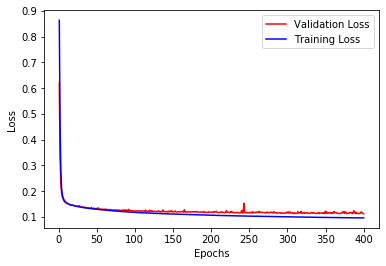

In [23]:
import matplotlib.pyplot as plt

val_loss = history_detection.history["val_loss"]
loss = history_detection.history["loss"]

epochs = range(1, 401)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [24]:
predictions_label = model_detection.predict(X_tst_detection)

In [25]:
y_pred = np.zeros([len(X_tst_detection),1])
for i in range(len(X_tst_detection)):
    y_pred[i,0] = np.argmax(predictions_label[i])

### Metrics

In [26]:
### Detection Module

n_cc=1
n_cs=1
n_cr=1
n_sc=1
n_ss=1
n_sr=1
n_rc=1
n_rs=1
n_rr=1

precip_c= 0
precip_r= 1
precip_s= 2

for i in range(len(X_tst_detection)):
    label_predict = y_pred[i]
    label_actual = t_test[i]
    if label_predict==precip_c and label_actual==precip_c:
        n_cc+=1
    if label_predict==precip_s and label_actual==precip_s:
        n_ss+=1
    if label_predict==precip_r and label_actual==precip_r:
        n_rr+=1 
    if label_predict==precip_c and label_actual==precip_s:
        n_cs+=1
    if label_predict==precip_c and label_actual==precip_r:
        n_cr+=1
    if label_predict==precip_s and label_actual==precip_c:
        n_sc+=1
    if label_predict==precip_s and label_actual==precip_r:
        n_sr+=1  
    if label_predict==precip_r and label_actual==precip_c:
        n_rc+=1
    if label_predict==precip_r and label_actual==precip_s:
        n_rs+=1        
        
#Snow
TP_s = n_ss
TN_s = n_cc+n_cr+n_rc+n_rr
FP_s = n_sc+n_sr
FN_s = n_cs+n_rs

precision_s = TP_s/(TP_s+FP_s)
acc_s = (TP_s+TN_s)/(TP_s+TN_s+FP_s+FN_s)
recall_s = TP_s/(TP_s+FN_s)
f1_score_s = (2*precision_s*recall_s)/(precision_s+recall_s)
FPR_s = FP_s/(FP_s+TN_s)

#Rain
TP_r = n_rr
TN_r = n_cc+n_cs+n_sc+n_ss
FP_r = n_rc+n_rs
FN_r = n_cr+n_sr

precision_r = TP_r/(TP_r+FP_r)
acc_r = (TP_r+TN_r)/(TP_r+TN_r+FP_r+FN_r)
recall_r = TP_r/(TP_r+FN_r)
f1_score_r = (2*precision_r*recall_r)/(precision_r+recall_r)
FPR_r = FP_r/(FP_r+TN_r) 

print('\n For Rainfall Detection Over Land:\n')
print('Precision: ',precision_r)
print('Accuracy: ',acc_r)
print('Recall (TPR): ',recall_r)
print('False Alarm (FPR): ',FPR_r)
print('\nF1 Score: ',f1_score_r)

print('----------------------------')
print('\n For Snwofall Detection Over Land:\n')
print('Precision: ',precision_s)
print('Accuracy: ',acc_s)
print('Recall (TPR): ',recall_s)
print('False Alarm (FPR): ',FPR_s)
print('\nF1 Score: ',f1_score_s)

#Model
TP = n_cc+n_ss+n_rr
FP = n_cs+n_cr+n_sc+n_sr+n_rc+n_rs
FN = n_sc+n_rc+n_cs+n_rs+n_cr+n_sr

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2*precision*recall)/(precision+recall)

print('----------------------------')
print('\n For Model Detection Over Land:\n')
print('Precision: ',precision)
print('Recall (TPR): ',recall)
print('\nF1 Score: ',f1_score)


 For Rainfall Detection Over Land:

Precision:  0.9995261480141294
Accuracy:  0.9998607585446054
Recall (TPR):  0.9999138116785176
False Alarm (FPR):  0.00015678896205707118

F1 Score:  0.9997199422650209
----------------------------

 For Snwofall Detection Over Land:

Precision:  0.9073302790503956
Accuracy:  0.9595128691237428
Recall (TPR):  0.93337617823479
False Alarm (FPR):  0.03177527383859589

F1 Score:  0.920168954593453
----------------------------

 For Model Detection Over Land:

Precision:  0.9594057603119008
Recall (TPR):  0.9594057603119008

F1 Score:  0.9594057603119008


In [27]:
model_detection.evaluate(X_tst_detection, t_tst_detection, batch_size = batch_size1)

187/187 [==============================] - 0s 2ms/step - loss: 0.1089 - recall_2: 0.9595


[0.1088700145483017, 0.9594660997390747]

## DNN - Retrieval Module

In [12]:
from tensorflow.keras import backend
def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred-y_true)))
    
def mean_absolute_error(y_true, y_pred):
        return backend.mean(backend.abs(y_pred-y_true))        

### Snow

In [13]:
# Parameters
hidden_units = 60
dropout = 0

# LAND
model_retrieval = Sequential()

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(hidden_units))
model_retrieval.add(Activation('relu'))
model_retrieval.add(Dropout(dropout))

model_retrieval.add(Dense(1))
model_retrieval.add(Activation('relu'))

In [14]:
model_retrieval.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = root_mean_squared_error,
              metrics= mean_absolute_error)

In [15]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [16]:
print('\nFitting DNN (Retrieval Module - Snow):\n')
batch_size2 = 500
history_retrieval = model_retrieval.fit(X_trn_retrieval, y_trn_retrieval, epochs=400,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Snow):

Epoch 1/400
349/349 [==============================] - 1s 3ms/step - loss: 0.1974 - mean_absolute_error: 0.0764 - val_loss: 0.2289 - val_mean_absolute_error: 0.0549
Epoch 2/400
349/349 [==============================] - 1s 2ms/step - loss: 0.1569 - mean_absolute_error: 0.0453 - val_loss: 0.2105 - val_mean_absolute_error: 0.0444
Epoch 3/400
349/349 [==============================] - 1s 2ms/step - loss: 0.1428 - mean_absolute_error: 0.0390 - val_loss: 0.2002 - val_mean_absolute_error: 0.0397
Epoch 4/400
349/349 [==============================] - 1s 2ms/step - loss: 0.1346 - mean_absolute_error: 0.0355 - val_loss: 0.1938 - val_mean_absolute_error: 0.0372
Epoch 5/400
349/349 [==============================] - 1s 2ms/step - loss: 0.1292 - mean_absolute_error: 0.0333 - val_loss: 0.1896 - val_mean_absolute_error: 0.0352
Epoch 6/400
349/349 [==============================] - 1s 2ms/step - loss: 0.1259 - mean_absolute_error: 0.0318 - val_loss: 0.1865 - v

349/349 [==============================] - 1s 2ms/step - loss: 0.0981 - mean_absolute_error: 0.0206 - val_loss: 0.1603 - val_mean_absolute_error: 0.0247
Epoch 100/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0980 - mean_absolute_error: 0.0206 - val_loss: 0.1601 - val_mean_absolute_error: 0.0247
Epoch 101/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0977 - mean_absolute_error: 0.0206 - val_loss: 0.1600 - val_mean_absolute_error: 0.0247
Epoch 102/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0978 - mean_absolute_error: 0.0206 - val_loss: 0.1600 - val_mean_absolute_error: 0.0245
Epoch 103/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0977 - mean_absolute_error: 0.0205 - val_loss: 0.1602 - val_mean_absolute_error: 0.0246
Epoch 104/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0977 - mean_absolute_error: 0.0205 - val_loss: 0.1600 - val_mean_absolute_error: 0.0246
Epoch 105/40

349/349 [==============================] - 1s 2ms/step - loss: 0.0949 - mean_absolute_error: 0.0195 - val_loss: 0.1585 - val_mean_absolute_error: 0.0238
Epoch 198/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0952 - mean_absolute_error: 0.0195 - val_loss: 0.1584 - val_mean_absolute_error: 0.0239
Epoch 199/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0955 - mean_absolute_error: 0.0196 - val_loss: 0.1585 - val_mean_absolute_error: 0.0239
Epoch 200/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0948 - mean_absolute_error: 0.0195 - val_loss: 0.1585 - val_mean_absolute_error: 0.0239
Epoch 201/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0953 - mean_absolute_error: 0.0195 - val_loss: 0.1583 - val_mean_absolute_error: 0.0238
Epoch 202/400
349/349 [==============================] - 1s 2ms/step - loss: 0.0946 - mean_absolute_error: 0.0195 - val_loss: 0.1584 - val_mean_absolute_error: 0.0239
Epoch 203/40

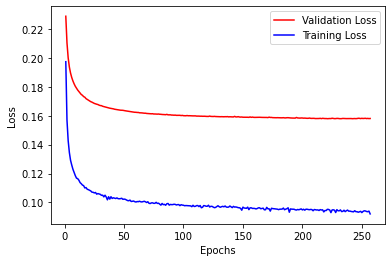

In [18]:
import matplotlib.pyplot as plt

val_loss = history_retrieval.history["val_loss"]
loss = history_retrieval.history["loss"]

epochs = range(1, 258)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [19]:
predictions_snow = model_retrieval.predict(X_tst_retrieval)

### Evaluation

In [20]:
model_retrieval.evaluate(X_tst_retrieval, y_tst_retrieval, batch_size = batch_size2)

187/187 [==============================] - 0s 593us/step - loss: 0.1309 - mean_absolute_error: 0.0246


[0.13085953891277313, 0.02459748461842537]

# Checking Outputs

In [21]:
from scipy.stats import gaussian_kde
x = y_tst_retrieval
y = predictions_snow
idx_snow = (x>0) & (y[:]>0)
mask_TP=idx_snow[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [22]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(y-x)/len(x)
print('RMSE snow:', rmse, 'mm/hr')
print('MAE snow:', mae, 'mm/hr')
print('bias snow:', bias, 'mm/hr')

RMSE snow: 0.4224560399277009 mm/hr
MAE snow: 0.08282923375233696 mm/hr
bias snow: -0.01919354259327489 mm/hr


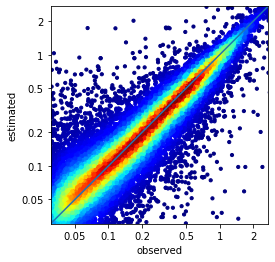

In [23]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-3.5, 1], [-3.5, 1])
ax.set_xlim(-3.5, 1)
ax.set_ylim(-3.5, 1)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.05), np.log(0.1), np.log(0.2), np.log(0.5), np.log(1), np.log(2)])
ax.set_xticklabels(['0.05', '0.1','0.2','0.5', '1', '2'])
ax.set_yticks([np.log(0.05), np.log(0.1), np.log(0.2), np.log(0.5), np.log(1), np.log(2)])
ax.set_yticklabels(['0.05', '0.1','0.2','0.5', '1', '2'])
plt.xlabel("observed")
plt.ylabel("estimated")
plt.show()

In [58]:
model_detection.save('Models\CPR\Land\model_dtc',save_format='h5')
model_retrieval.save('Models\CPR\Land\model_snow',save_format='h5')

In [59]:
import scipy
from scipy.io import savemat

fp_CPR_land = 'Models/CPR/land/files_CPR_land.mat'
scipy.io.savemat(fp_CPR_land, {'mean_detection_CPR_land': mean_detection,'std_detection_CPR_land':std_detection,
                               'mean_snow_retrieval_CPR_land': mean_retrieval,'std_snow_retrieval_CPR_land':std_retrieval})

## Save Files

In [ ]:
import scipy
from scipy.io import savemat

fp_DNN_detection = 'label_pred_land_CPR.mat'
fp_actual_detection = 't_test_label_land_CPR.mat'
scipy.io.savemat(fp_DNN_detection, {'label_pred_land_CPR': y_pred})
scipy.io.savemat(fp_actual_detection, {'t_test_label_land_CPR': t_test})

fp_DNN_retrieval = 'rate_pred_land_CPR.mat'
fp_actual_retrieval = 't_test_rate_land_CPR.mat'
scipy.io.savemat(fp_DNN_retrieval, {'rate_pred_land_CPR': predictions_snow})
scipy.io.savemat(fp_actual_retrieval, {'t_test_rate_land_CPR': y_tst_retrieval})

## Observation Orbits

In [ ]:
g = h5py.File("Orbital/Orbit6308_dics.mat",'r')
list(g.keys())

In [ ]:
X0_detection = g['X_detection']
X1_detection = np.transpose(X0_detection)
X2_detection = np.transpose(X1_detection)

X0_retrieval = g['x_retrieval_CPR_land']
X1_retrieval = np.transpose(X0_retrieval)

In [ ]:
X3_detection = X2_detection-mean_detection
X_detection = X3_detection/std_detection

X2_retrieval = X1_retrieval-mean_retrieval
X_retrieval = X2_retrieval/std_retrieval

In [ ]:
label_pred_obs = model_detection.predict(X_detection)

In [ ]:
y_pred_obs = np.zeros([len(X_detection),1])
for i in range(len(X_detection)):
    y_pred_obs[i,0] = np.argmax(label_pred_obs[i])

In [ ]:
rate_pred_obs = model_retrieval.predict(X_retrieval)

In [ ]:
import scipy
from scipy.io import savemat

fp_detection = 'label_pred_land_CPR_6308.mat'
fp_retrieval = 'rate_pred_land_CPR_6308.mat'
scipy.io.savemat(fp_detection, {'label_pred_land_CPR': y_pred_obs})
scipy.io.savemat(fp_retrieval, {'rate_pred_land_CPR': rate_pred_obs})                          